In [101]:
import torch

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [140]:
output_dirs = {
    "midas_hkrm_random": (
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm/state_270000.tar",
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v1_test_set/",
    ),
    "midas_hkrm_v2": (
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm_v2/state_79999.tar",
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v2_test_set/",
    ),
    "midas_hkrm_v3": (
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm_v3/state_69999.tar",
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v3_test_set/",
    ),
    "midas_hkrm_v4": (
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_hkrm_v4/state_69999.tar",
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_v4_test_set/",
    ),
    "midas_hkrm_baseline": (
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/output_midas_obj_baseline/state_79999.tar",
        "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/eval_midas_hkrm_baseline_test_set/",
    ),
}

<IPython.core.display.Javascript object>

## Train losses

In [81]:
train_losses = dict()
for k, v in output_dirs.items():
    last_state, _ = v
    train_losses[k] = torch.load(last_state)["train_losses"]

<IPython.core.display.Javascript object>

In [83]:
random_hkrm_losses = train_losses["midas_hkrm_random"].values()
random_hkrm_losses = [sum(v.values()) / 6 for v in random_hkrm_losses]

<IPython.core.display.Javascript object>

In [84]:
step = 10000

<IPython.core.display.Javascript object>

In [85]:
train_losses["midas_hkrm_random"] = random_hkrm_losses[:70000:step]

<IPython.core.display.Javascript object>

In [86]:
train_losses["midas_hkrm_v2"] = list(train_losses["midas_hkrm_v2"].values())[
    :70000:step
]

<IPython.core.display.Javascript object>

In [87]:
train_losses["midas_hkrm_v3"] = list(train_losses["midas_hkrm_v3"].values())[
    :70000:step
]

<IPython.core.display.Javascript object>

In [88]:
train_losses["midas_hkrm_v4"] = list(train_losses["midas_hkrm_v4"].values())[
    :70000:step
]

<IPython.core.display.Javascript object>

In [89]:
train_losses["midas_hkrm_baseline"] = list(
    train_losses["midas_hkrm_baseline"].values()
)[:70000:step]

<IPython.core.display.Javascript object>

In [90]:
import seaborn as sns

<IPython.core.display.Javascript object>

In [91]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

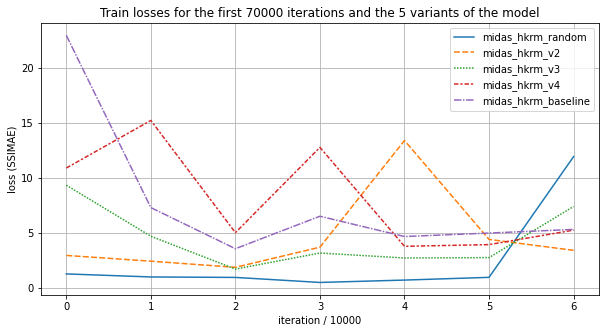

<IPython.core.display.Javascript object>

In [138]:
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.lineplot(data=train_losses)
plt.title("Train losses for the first 70000 iterations and the 5 variants of the model")
plt.xlabel("iteration / 10000")
plt.ylabel("loss (SSIMAE)")
plt.savefig("train_losses.jpg")

## Test losses

In [103]:
import os

<IPython.core.display.Javascript object>

In [132]:
import re
from collections import OrderedDict
import pickle

<IPython.core.display.Javascript object>

In [119]:
iter_re = re.compile("state_(?P<iteration>[0-9]*).pickle")

<IPython.core.display.Javascript object>

In [121]:
iter_re.fullmatch("state_50000.pickle")["iteration"]

'50000'

<IPython.core.display.Javascript object>

In [149]:
test_losses = dict()
for k, v in output_dirs.items():
    _, folder = v
    state_files = os.listdir(folder)
    losses = []
    for state_file in state_files:
        iteration = int(iter_re.fullmatch(state_file)["iteration"])
        with open(os.path.join(folder, state_file), "rb") as handle:
            losses.append((iteration, sum(pickle.load(handle)["test"].values()) / 600))
    print(losses)
    test_losses[k] = OrderedDict(sorted(losses, key=lambda x: x[0]))

[(10000, 0.9701346206665039), (50000, 0.8815432612101237), (40000, 0.9002616628011068), (20000, 0.9326183700561523), (60000, 0.8747562090555827), (70000, 0.8638640530904134), (0, 1.5456031163533528), (30000, 0.9105792872111003)]
[(9999, 0.7085500208536784), (79999, 0.6828040568033854), (0, 0.8242883237202963), (29999, 0.7222916412353516), (89999, 0.6831610425313314), (39999, 0.6946697934468588), (19999, 0.7058426793416341), (49999, 0.7003979110717773), (69999, 0.6849006779988607), (59999, 0.6904962857564291)]
[(9999, 0.6910744031270345), (0, 1.7260772959391275), (29999, 0.660183842976888), (39999, 0.6829019927978516), (19999, 0.6822305170694987), (49999, 0.6792111015319824), (69999, 0.6656938934326172), (59999, 0.6614983240763347)]
[(9999, 1.0987030919392904), (79999, 1.022517484029134), (0, 1.7418441009521484), (29999, 1.0518748219807943), (89999, 1.0234021250406902), (39999, 1.0460446039835611), (19999, 1.0956473922729493), (49999, 1.036259930928548), (69999, 1.0302981694539388), (59

<IPython.core.display.Javascript object>

In [150]:
test_losses

{'midas_hkrm_random': OrderedDict([(0, 1.5456031163533528),
              (10000, 0.9701346206665039),
              (20000, 0.9326183700561523),
              (30000, 0.9105792872111003),
              (40000, 0.9002616628011068),
              (50000, 0.8815432612101237),
              (60000, 0.8747562090555827),
              (70000, 0.8638640530904134)]),
 'midas_hkrm_v2': OrderedDict([(0, 0.8242883237202963),
              (9999, 0.7085500208536784),
              (19999, 0.7058426793416341),
              (29999, 0.7222916412353516),
              (39999, 0.6946697934468588),
              (49999, 0.7003979110717773),
              (59999, 0.6904962857564291),
              (69999, 0.6849006779988607),
              (79999, 0.6828040568033854),
              (89999, 0.6831610425313314)]),
 'midas_hkrm_v3': OrderedDict([(0, 1.7260772959391275),
              (9999, 0.6910744031270345),
              (19999, 0.6822305170694987),
              (29999, 0.660183842976888),
          

<IPython.core.display.Javascript object>

In [152]:
for k, v in test_losses.items():
    test_losses[k] = list(v.values())[:8]

<IPython.core.display.Javascript object>

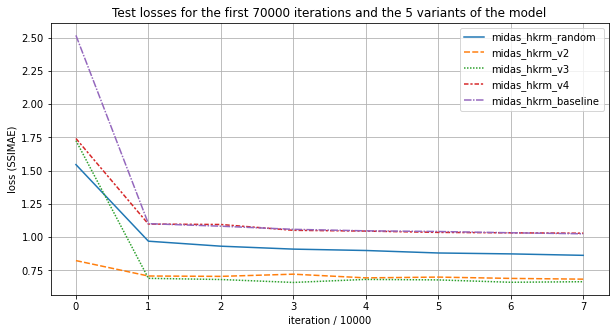

<IPython.core.display.Javascript object>

In [153]:
plt.figure(figsize=(10, 5))
plt.grid(True)
sns.lineplot(data=test_losses)
plt.title("Test losses for the first 70000 iterations and the 5 variants of the model")
plt.xlabel("iteration / 10000")
plt.ylabel("loss (SSIMAE)")
plt.savefig("test_losses.jpg")